# Performance Mesurement

Import packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

To do: improve plot
- increase size
- include arrows and text

## Get Financial Data

Set parameters

In [8]:
key = 'AAPL'

In [9]:
source = 'iex'

In [10]:
start = datetime.datetime(2016, 1, 1)

In [11]:
end = datetime.datetime(2019, 1, 1)

Financial data

In [12]:
data = web.DataReader(key, source, start, end)

In [13]:
data.head(10)

,open,high,low,close,volume
date,,,,,
2016-01-04,96.9111,99.5159,96.3350,99.4989,67649387
2016-01-05,99.8767,99.9711,96.7222,97.0055,55790992
2016-01-06,94.9749,96.6844,94.3233,95.1072,68457388
2016-01-07,93.1993,94.5688,91.0743,91.0932,81094428
2016-01-08,93.0766,93.6055,91.3860,91.5749,70798016
2016-01-11,93.4732,93.5582,91.9338,93.0577,49739377
2016-01-12,94.9655,95.0977,93.3504,94.4083,49154227
2016-01-13,94.7483,95.5699,91.8960,91.9810,62439631
2016-01-14,92.5193,94.8994,90.4226,93.9927,63170127


Convert index to datetime

In [14]:
data.index = pd.to_datetime(data.index)

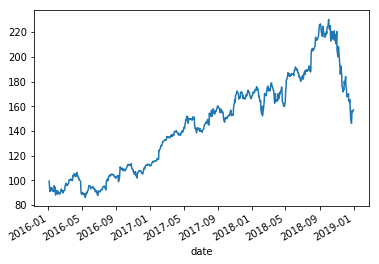

In [15]:
data.close.plot()

## Calculate the Sharpe Ratio

### Strategy 1: Buy-and-Hold Long Only
- buy the stock on 4th of Jan 2016
- sell the stock on the close of 31st Dec 2018

Calculate daily returns

In [16]:
close = data.close

In [17]:
returns = close.pct_change()

In [18]:
returns.head(10)

date
2016-01-04         NaN
2016-01-05   -0.025060
2016-01-06   -0.019569
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
2016-01-12    0.014514
2016-01-13   -0.025711
2016-01-14    0.021871
2016-01-15   -0.024016
Name: close, dtype: float64

Calculate daily excess returns assuming:
- risk-free rate is 2.5% per year
- 252 trading days a year

Note that we are subtracting the risk-free due financing costs 

In [19]:
risk_free_rate = 0.025

In [20]:
trading_days = 252

Don't forget to convert yearly risk-free rate to daily risk-free rate

In [21]:
excess_returns = returns - risk_free_rate / trading_days

In [22]:
excess_returns.head(10)

date
2016-01-04         NaN
2016-01-05   -0.025159
2016-01-06   -0.019668
2016-01-07   -0.042304
2016-01-08    0.005189
2016-01-11    0.016093
2016-01-12    0.014414
2016-01-13   -0.025810
2016-01-14    0.021772
2016-01-15   -0.024115
Name: close, dtype: float64

Calculate Sharpe ratio (annualized)
- average and standard deviation of daily excess returns
- convert to daily Sharpe ratio to yearly by multiplying by `np.sqrt(252)`

In [23]:
sharpe_ratio = np.sqrt(252) * np.mean(excess_returns) / np.std(excess_returns)

In [24]:
sharpe_ratio

0.655779255508552

### Strategy 2: Buy-and-Hold Market-Neutral Strategy
- buy AAPL and short SPY on the 4th of Jan 2016
- close the position on the 31st of Dec 2018

Get data for SPY

In [25]:
key = 'SPY'

In [26]:
data = web.DataReader(key, source, start, end)

In [27]:
data.head(10)

,open,high,low,close,volume
date,,,,,
2016-01-04,188.1247,188.6314,186.3419,188.6212,222353534
2016-01-05,188.9786,189.4477,187.7118,188.9410,110845849
2016-01-06,186.1073,187.7212,185.4129,186.5577,152112604
2016-01-07,183.2829,185.2628,181.6502,182.0819,213436073
2016-01-08,183.1516,183.7709,179.7642,180.0861,209817228
2016-01-11,181.1060,181.4813,178.1128,180.2615,187941323
2016-01-12,181.8661,182.5510,179.3513,181.7167,172330490
2016-01-13,182.4572,182.8419,176.7616,177.1838,221168886
2016-01-14,177.8594,181.3406,176.0860,180.0926,240795609


In [28]:
data.index = pd.to_datetime(data.index)

In [29]:
spy_close = data.close

Calculate daily returns

In [30]:
spy_returns = spy_close.pct_change()

In [31]:
spy_returns.head(10)

date
2016-01-04         NaN
2016-01-05    0.001695
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010961
2016-01-11    0.000974
2016-01-12    0.008073
2016-01-13   -0.024945
2016-01-14    0.016417
2016-01-15   -0.021466
Name: close, dtype: float64

Calculate the daily net return of the portfolio which is long AAPL and short SPY

In [32]:
net_returns = (returns - spy_returns) / 2

In [33]:
net_returns.head(10)

date
2016-01-04         NaN
2016-01-05   -0.013378
2016-01-06   -0.003478
2016-01-07   -0.009107
2016-01-08    0.008124
2016-01-11    0.007609
2016-01-12    0.003220
2016-01-13   -0.000383
2016-01-14    0.002727
2016-01-15   -0.001275
Name: close, dtype: float64

Note that we don't need to substract the risk-free rate because our strategy is self-financing:
- to calculate the Sharpe ratio, we have `net_returns - risk_free_rate`
- however, since our short position provided us cash which grows at the same rate `net_return - risk_free_rate + risk_free_rate

Calculate Sharpe ratio (annualized)
- average and standard deviation of daily excess returns
- convert to daily Sharpe ratio to yearly by multiplying by `np.sqrt(252)`

In [34]:
sharpe_Ratio = np.sqrt(trading_days) * np.mean(net_returns) / np.std(net_returns)

In [35]:
sharpe_Ratio

0.437391016896497

## Calculate the Maximum Drawdown and Maximum Drawdown Duration

### Function `calculate_maxdd`

Create function for calculating maximum drawdown and maximum drawdown duration

In [36]:
def calculate_maxdd(cum_returns):
    
    # Initialize high watermark to zero
    high_watermark = pd.Series(np.zeros(len(cum_returns)), index=cum_returns.index)
    
    # Initialize drawdowns to zero
    drawdown = pd.Series(np.zeros(len(cum_returns)), index=cum_returns.index)
    
    # Initialize drawdown duration to zero
    drawdown_duration = pd.Series(np.zeros(len(cum_returns)), index=cum_returns.index)
    
    for i in range(len(cum_returns)):
        if i == 0:
            pass
        else:
            # High watermark
            high_watermark.iloc[i] = np.max([cum_returns.iloc[i], high_watermark.iloc[i-1]])
            # Drawdown
            drawdown.iloc[i] = (1 + high_watermark.iloc[i]) / (1 + cum_returns.iloc[i]) - 1
            # Drawdown duration
            if drawdown.iloc[i] == 0:
                drawdown_duration.iloc[i] = 0
            else:
                drawdown_duration.iloc[i] = drawdown_duration.iloc[i-1] + 1
    
    # max_dd and max_ddd are maximum drawdown (in %) and maximum drawdown duration (in days), respectively
    max_dd = np.max(drawdown)
    max_ddd = np.max(drawdown_duration)
    
    return max_dd, max_ddd

### Strategy 1: Buy-and-Hold Long Only

In [37]:
cumulative_returns = np.cumprod(1 + excess_returns) - 1

In [38]:
cumulative_returns.head(10)

date
2016-01-04         NaN
2016-01-05   -0.025159
2016-01-06   -0.044332
2016-01-07   -0.084761
2016-01-08   -0.080012
2016-01-11   -0.065207
2016-01-12   -0.051732
2016-01-13   -0.076207
2016-01-14   -0.056094
2016-01-15   -0.078857
Name: close, dtype: float64

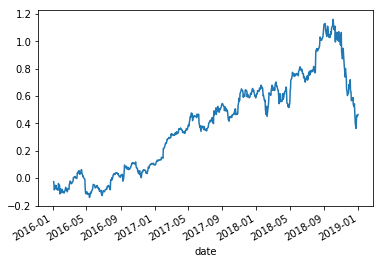

In [39]:
cumulative_returns.plot()

In [40]:
a, b = calculate_maxdd(cumulative_returns)

The maximum drawdown in %

In [41]:
a

0.5838892357744825

While the maximum drawdown duration in days

In [42]:
b

106.0

### Strategy 2: Buy-and-Hold Market-Neutral

Calculate cumulative compounded returns

In [43]:
cumulative_returns = np.cumprod(1 + net_returns) - 1

In [44]:
cumulative_returns.head(10)

date
2016-01-04         NaN
2016-01-05   -0.013378
2016-01-06   -0.016808
2016-01-07   -0.025762
2016-01-08   -0.017847
2016-01-11   -0.010374
2016-01-12   -0.007187
2016-01-13   -0.007567
2016-01-14   -0.004860
2016-01-15   -0.006129
Name: close, dtype: float64

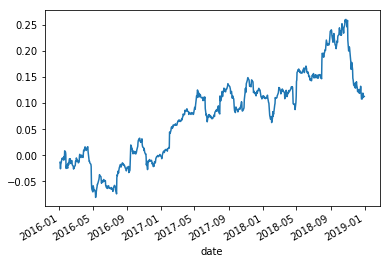

In [45]:
cumulative_returns.plot()

In [46]:
a, b = calculate_maxdd(cumulative_returns)

The maximum drawdown in %

In [47]:
a

0.1378978856468498

While the maximum drawdown duration in days

In [48]:
b

119.0